In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Major Project-Cleaned Data.csv',index_col=0)
df.head(3)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,2140870789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,16-07-20
2,1,7646270374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,16-08-10
3,1,1794370372,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,16-08-19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190001 entries, 1 to 190001
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 190001 non-null  int64  
 1   msisdn                190001 non-null  int64  
 2   aon                   190001 non-null  float64
 3   daily_decr30          190001 non-null  float64
 4   daily_decr90          190001 non-null  float64
 5   rental30              190001 non-null  float64
 6   rental90              190001 non-null  float64
 7   last_rech_date_ma     190001 non-null  float64
 8   last_rech_date_da     190001 non-null  float64
 9   last_rech_amt_ma      190001 non-null  int64  
 10  cnt_ma_rech30         190001 non-null  int64  
 11  fr_ma_rech30          190001 non-null  float64
 12  sumamnt_ma_rech30     190001 non-null  float64
 13  medianamnt_ma_rech30  190001 non-null  float64
 14  medianmarechprebal30  190001 non-null  float64
 15  

## Check for the correlation with the dependent variable 'Label

In [4]:
df.corr()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.001422,-0.003372,0.167243,0.165561,0.058373,0.076050,0.003078,0.002682,0.130805,...,0.196452,0.197388,0.000295,0.044759,0.004201,0.199722,0.084151,0.036027,0.048064,0.048983
msisdn,0.001422,1.000000,0.001304,0.001819,0.001884,-0.001151,-0.000241,-0.000334,0.001158,-0.003234,...,0.003365,0.003786,-0.000437,0.001956,0.001986,0.001312,0.004113,0.002043,0.002929,0.001715
aon,-0.003372,0.001304,1.000000,-0.000307,-0.000975,-0.001267,-0.001179,0.001309,-0.001197,0.003895,...,-0.001785,-0.001713,-0.002448,0.005360,0.000061,-0.002298,-0.001458,0.003311,0.002276,0.002721
daily_decr30,0.167243,0.001819,-0.000307,1.000000,0.970386,0.438152,0.455634,0.002098,-0.002099,0.275956,...,0.363230,0.467655,0.000596,-0.011772,0.009379,0.559091,0.397205,-0.036953,0.025815,0.045368
daily_decr90,0.165561,0.001884,-0.000975,0.970386,1.000000,0.430576,0.468348,0.002480,-0.002123,0.264253,...,0.339230,0.446350,0.000273,-0.005605,0.008954,0.565085,0.395365,-0.034653,0.018580,0.039680
rental30,0.058373,-0.001151,-0.001267,0.438152,0.430576,1.000000,0.947576,-0.000092,0.003553,0.128059,...,0.179577,0.232066,-0.000184,-0.017598,0.004154,0.297202,0.232294,-0.034965,0.070732,0.092804
rental90,0.076050,-0.000241,-0.001179,0.455634,0.468348,0.947576,1.000000,-0.000486,0.002747,0.122161,...,0.171715,0.231569,-0.001011,-0.010721,0.005241,0.326781,0.250197,-0.033741,0.065248,0.097252
last_rech_date_ma,0.003078,-0.000334,0.001309,0.002098,0.002480,-0.000092,-0.000486,1.000000,0.001002,0.000102,...,0.002420,0.002083,0.000535,0.002246,0.000326,0.002368,-0.000835,0.003654,-0.001790,-0.001634
last_rech_date_da,0.002682,0.001158,-0.001197,-0.002099,-0.002123,0.003553,0.002747,0.001002,1.000000,0.000353,...,-0.000224,-0.000086,0.000943,0.000044,-0.002847,0.000055,0.001906,-0.002535,0.000313,0.000870
last_rech_amt_ma,0.130805,-0.003234,0.003895,0.275956,0.264253,0.128059,0.122161,0.000102,0.000353,1.000000,...,-0.027524,0.008792,0.001117,0.028081,-0.000060,0.014030,0.148354,0.021031,-0.027908,-0.015397


<AxesSubplot:>

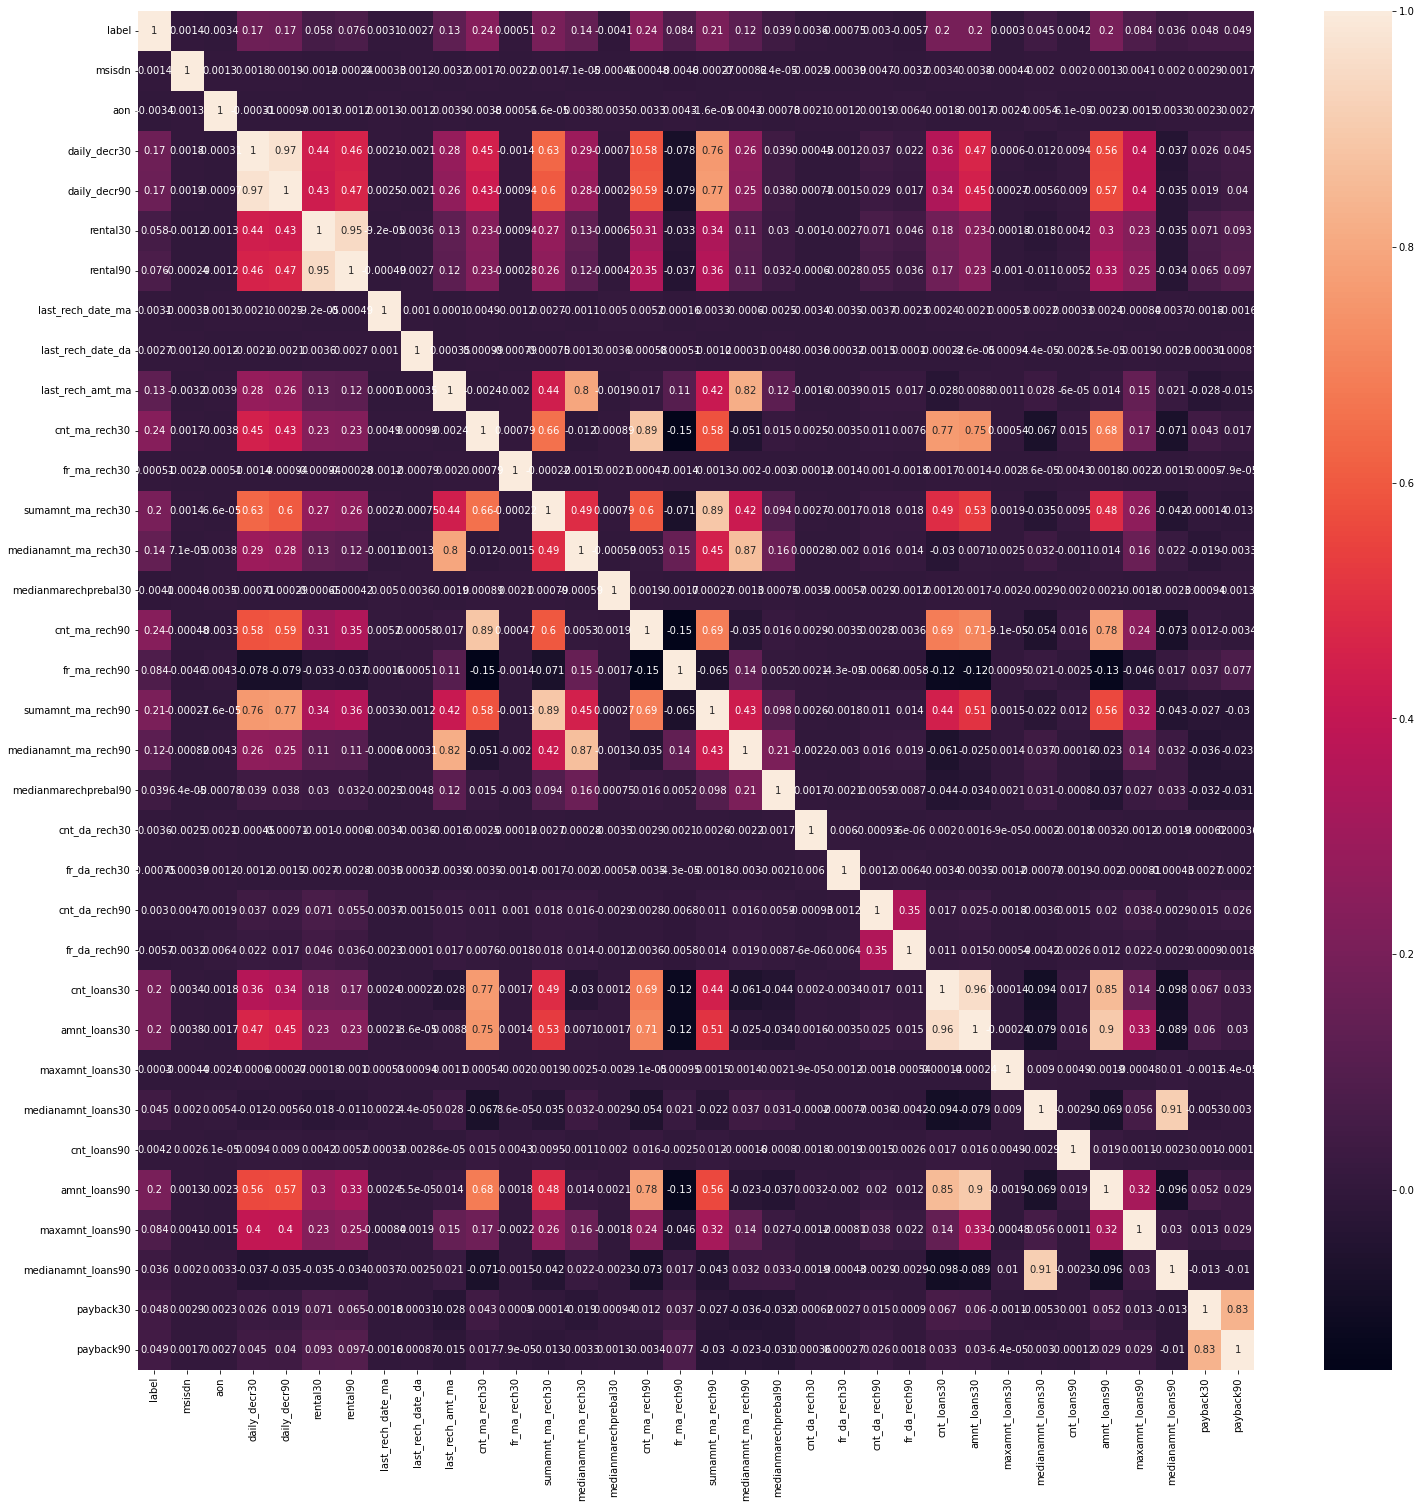

In [5]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True)

In [6]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [7]:
corr_features = correlation(df, 0.5)
len(set(corr_features))

12

These 12 columns will affect our accuracy, so we have removed them

In [8]:
corr_features

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans30',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech30',
 'medianamnt_ma_rech90',
 'payback90',
 'rental90',
 'sumamnt_ma_rech30',
 'sumamnt_ma_rech90'}

In [9]:
df_imp = df.drop(corr_features,axis=1)

The pcircle only has one value i.e UPW and pdate deals with the date.
So, removing both of them

In [10]:
df_imp = df_imp.drop(columns=['pcircle','pdate','msisdn'], axis=1)

In [11]:
df_imp.head(2)

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianmarechprebal30,...,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30
1,0,272.0,3055.05,220.13,2.0,0.0,1539,2,21.0,7.50,...,7.50,0.0,0.0,0,0,6.0,0.0,2.0,6,29.0
2,1,712.0,12122.00,3691.26,20.0,0.0,5787,1,0.0,61.04,...,61.04,0.0,0.0,0,0,12.0,0.0,1.0,12,0.0


Now we have 22 columns, from which 21 will be used as an input (independent) and 1 column will be used as an output(dependent)

In [12]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190001 entries, 1 to 190001
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 190001 non-null  int64  
 1   aon                   190001 non-null  float64
 2   daily_decr30          190001 non-null  float64
 3   rental30              190001 non-null  float64
 4   last_rech_date_ma     190001 non-null  float64
 5   last_rech_date_da     190001 non-null  float64
 6   last_rech_amt_ma      190001 non-null  int64  
 7   cnt_ma_rech30         190001 non-null  int64  
 8   fr_ma_rech30          190001 non-null  float64
 9   medianmarechprebal30  190001 non-null  float64
 10  fr_ma_rech90          190001 non-null  int64  
 11  medianmarechprebal90  190001 non-null  float64
 12  cnt_da_rech30         190001 non-null  float64
 13  fr_da_rech30          190001 non-null  float64
 14  cnt_da_rech90         190001 non-null  int64  
 15  

In [13]:
df_imp.columns

Index(['label', 'aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'medianmarechprebal30', 'fr_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'maxamnt_loans90', 'payback30'],
      dtype='object')

## Checking the normality of the features

<AxesSubplot:>

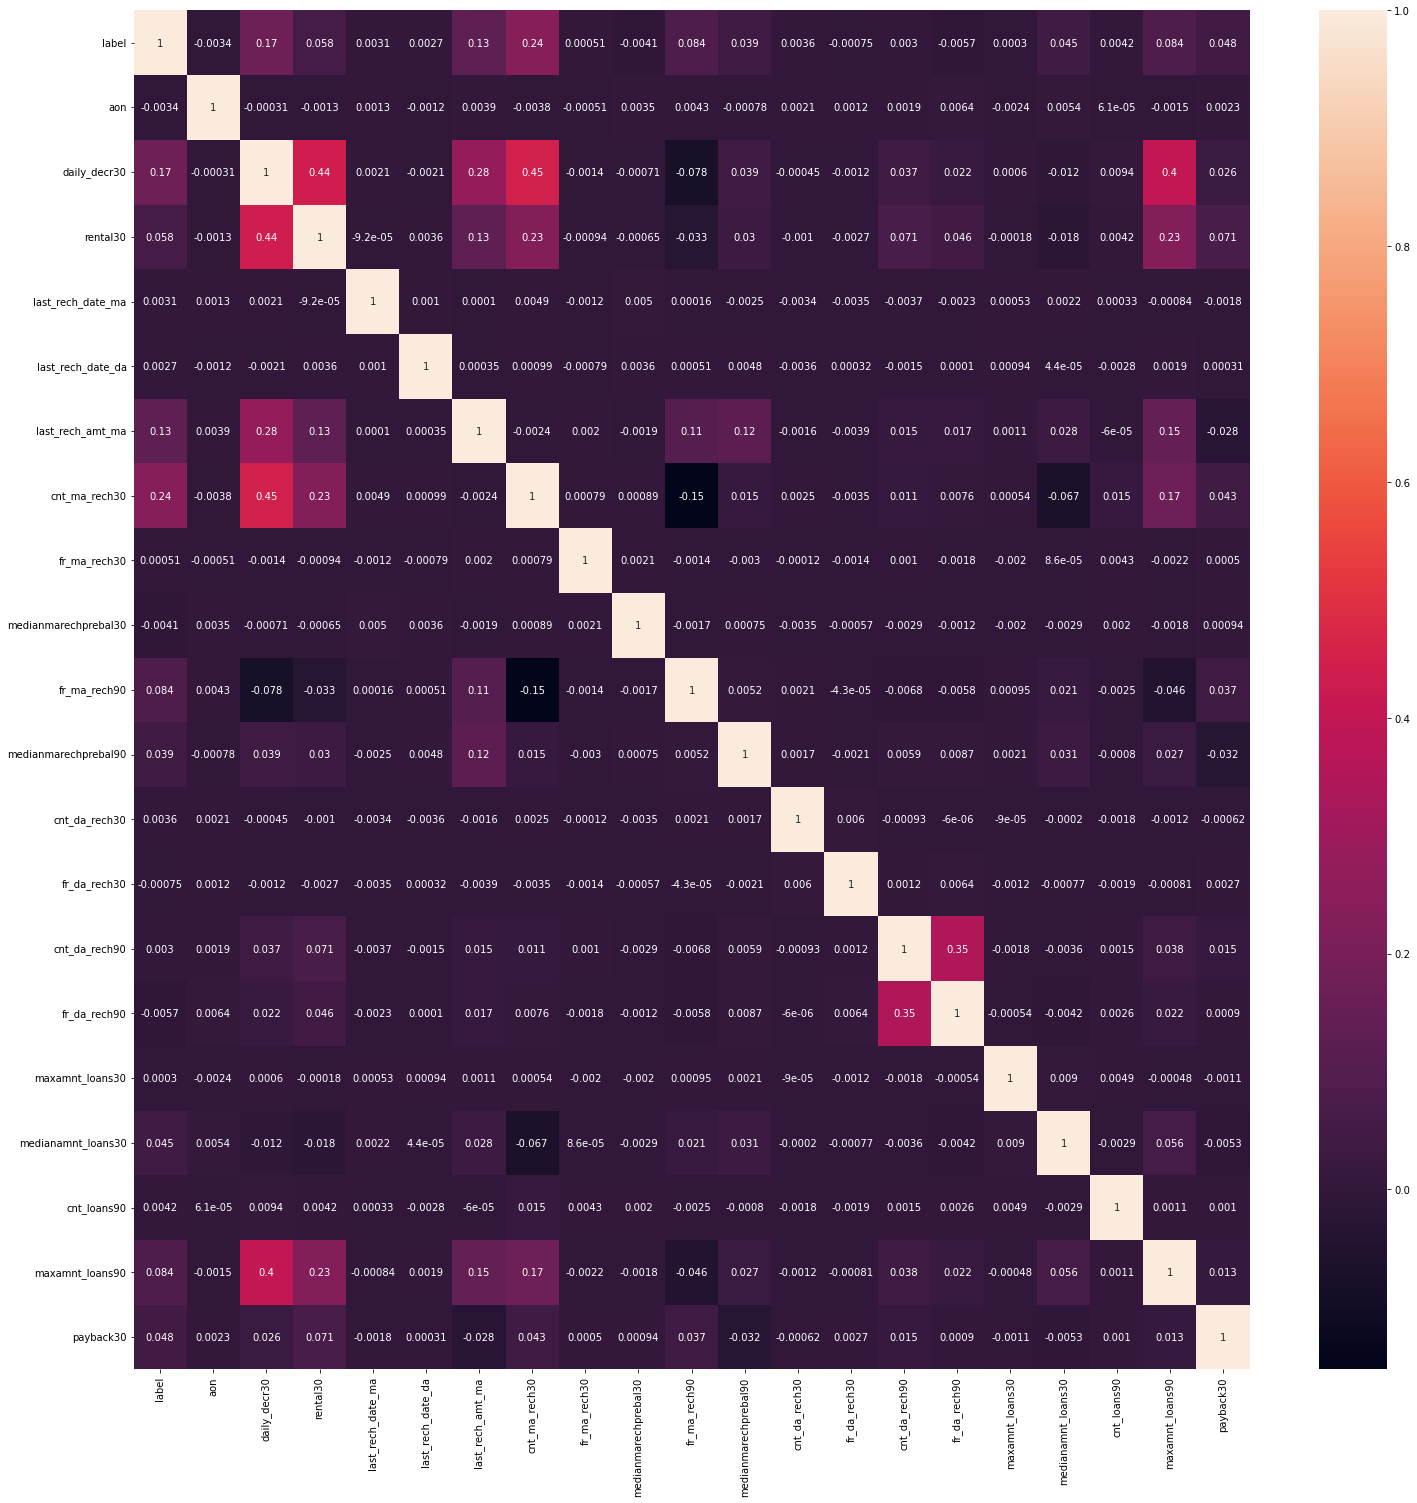

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df_imp.corr(), annot=True)

Now the features are nicely correlated

In [15]:
df_imp['label'].value_counts()

1    166264
0     23737
Name: label, dtype: int64

In [16]:
df_imp.isnull().sum()

label                   0
aon                     0
daily_decr30            0
rental30                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
medianmarechprebal30    0
fr_ma_rech90            0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
maxamnt_loans90         0
payback30               0
dtype: int64

# Input data X & Y

In [17]:
X = df_imp.drop(columns=['label'], axis=1)
y = df_imp['label']

Label is taken as a dependent variable (output)

# Dealing with Oversampling data
## Using SMOTE (Synthetic Minority Over-Sampling Technique)

In [18]:
df_label_1 = df[df["label"]==1]
df_label_0 = df[df["label"]==0]
print("Label 0: ",df_label_0.shape)
print("Label 1: ",df_label_1.shape)

Label 0:  (23737, 36)
Label 1:  (166264, 36)


In [19]:
print("Lable 1 has",df_label_1.shape[0] - df_label_0.shape[0],"rows more than label 0")

Lable 1 has 142527 rows more than label 0


In [20]:
from sklearn.model_selection import train_test_split
X_train_bf, X_test_bf, y_train_bf, y_test_bf = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
print("Before oversampling")
print("Shape of X_train_bf: ",X_train_bf.shape)
print("Shape of y_train_bf: ",y_train_bf.shape)
print("Shape of X_test_bf: ",X_test_bf.shape)
print("Shape of y_test_bf: ",y_test_bf.shape)

Before oversampling
Shape of X_train_bf:  (142500, 20)
Shape of y_train_bf:  (142500,)
Shape of X_test_bf:  (47501, 20)
Shape of y_test_bf:  (47501,)


In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    166264
1    166264
Name: label, dtype: int64

In [23]:
X_sm.shape, y_sm.shape

((332528, 20), (332528,))

# Input Split after SMOTE

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [25]:
y_train.value_counts()

1    133011
0    133011
Name: label, dtype: int64

In [26]:
print("After Oversampling")
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

After Oversampling
Shape of X_train:  (266022, 20)
Shape of y_train:  (266022,)
Shape of X_test:  (66506, 20)
Shape of y_test:  (66506,)


# Finding the best ML Model

We will use sample from X_train and y_train to find the accuracy score in less computation time

## Before Oversampling

In [27]:
X_train_sample = X_train_bf.iloc[0:200,:]
y_train_sample = y_train_bf.iloc[0:200,]
print("Shape of X_train_sample: ",X_train_sample.shape)
print("Shape of y_train_sample: ",y_train_sample.shape)

Shape of X_train_sample:  (200, 20)
Shape of y_train_sample:  (200,)


In [28]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5],
            'criterion': ["gini","entropy"]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5],
            "penalty": ["l1","l2"]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
        }
    },
    "KNN Classifier":{
        'model': KNeighborsClassifier(),
        'params':{
            "n_neighbors": [1,5],
            "metric" : ["euclidean",'chebyshev']
        }
    }
    
}


In [30]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train_sample, y_train_sample)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_check = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_check

,model,best_score,best_params
0,random_forest,0.860093,"{'criterion': 'gini', 'n_estimators': 5}"
1,logistic_regression,0.860018,"{'C': 1, 'penalty': 'l2'}"
2,decision_tree,0.800015,{'criterion': 'entropy'}
3,KNN Classifier,0.869893,"{'metric': 'euclidean', 'n_neighbors': 5}"


So, as seen above KNN Classifier gives the best score.

## After Oversampling

In [31]:
X_train_sample = X_train.iloc[0:200,:]
y_train_sample = y_train.iloc[0:200,]
print("Shape of X_train_sample: ",X_train_sample.shape)
print("Shape of y_train_sample: ",y_train_sample.shape)

Shape of X_train_sample:  (200, 20)
Shape of y_train_sample:  (200,)


In [32]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5],
            'criterion': ["gini","entropy"]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5],
            "penalty": ["l1","l2"]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
        }
    },
    "KNN Classifier":{
        'model': KNeighborsClassifier(),
        'params':{
            "n_neighbors": [1,5],
            "metric" : ["euclidean",'chebyshev']
        }
    }
    
}


In [33]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train_sample, y_train_sample)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_check = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_check

,model,best_score,best_params
0,random_forest,0.735112,"{'criterion': 'entropy', 'n_estimators': 5}"
1,logistic_regression,0.775139,"{'C': 1, 'penalty': 'l1'}"
2,decision_tree,0.720262,{'criterion': 'entropy'}
3,KNN Classifier,0.715363,"{'metric': 'euclidean', 'n_neighbors': 1}"


So, as seen above Decision Tree gives the best score